   # Document clustering using k-means using sklearn

In [1]:
import string
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.image import ImageWriter
from pdfminer.layout import LAParams

import io
import os

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import json
from pathlib import *

import time

from random import randint

from nltk.corpus import wordnet

import operator

from nltk.chunk import tree2conlltags
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import re

import numpy as np

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pooja Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
def processData(rawContents):    
    cleaned = tokenizeContent(rawContents)    
    cleaned1 = removeStopWordsFromTokenized(cleaned)    
    cleaned2 = performPorterStemmingOnContents(cleaned1)    
    cleaned3 = removePunctuationFromTokenized(cleaned2)    
    cleaned4 = convertItemsToLower(cleaned3)    
    return cleaned4    
        
def tokenizeContent(contentsRaw):    
    tokenized = nltk.tokenize.sent_tokenize(contentsRaw)    
    return tokenized    
    
def removeStopWordsFromTokenized(contentsTokenized):    
    stop_word_set = set(nltk.corpus.stopwords.words("english"))    
    filteredContents = [word for word in contentsTokenized if word not in stop_word_set]    
    return filteredContents    
    
def performPorterStemmingOnContents(contentsTokenized):    
    porterStemmer = nltk.stem.PorterStemmer()    
    filteredContents = [porterStemmer.stem(word) for word in contentsTokenized]    
    return filteredContents    
    
def removePunctuationFromTokenized(contentsTokenized):    
    excludePuncuation = set(string.punctuation)    
    
    # manually add additional punctuation to remove    
    doubleSingleQuote = '\'\''    
    doubleDash = '--'    
    doubleTick = '``'    
    
    excludePuncuation.add(doubleSingleQuote)    
    excludePuncuation.add(doubleDash)    
    excludePuncuation.add(doubleTick)    
    
    filteredContents = [word for word in contentsTokenized if word not in excludePuncuation]    
    return filteredContents    
    
def convertItemsToLower(contentsRaw):    
    filteredContents = [term.lower() for term in contentsRaw]    
    return filteredContents


In [17]:
def pdfRender():
    global documentSet
    global mydoc
    mydoc ={}
    pdf_files =[]
    allLines =[]
    FILE_PATH = Path(r'SLR3_EVALUATION_PAPERS/test/selected')
    #FILE_PATH = Path('E:/MasterThesis/FinalPapers')
    pdf_files = list(FILE_PATH.glob('*.pdf'))
    #An Array which stores the full text of each document
    documentSet = pdfparser(pdf_files)
    mydoc = dict(zip(pdf_files,documentSet))
    #print(len(documentSet))
    return documentSet

In [18]:
def pdfparser(pdffileS):    
    global dataset_dict
    global finalDocumentSet
    finalDocumentSet = []
    dataset_dict = {'filename': [] , 'docs': []}
    global pdfEx
    docs = []
    global fullText 
    for pdffile in pdffileS:
        #full= fullText
        # Create a example words list(Please add all the related keywords needed)
        words_list = [ "Abstract", "Introduction", "INTRODUCTION", "Motivation", "Description", "Overview", "Background", "BACKGROUND", "METHODOLOGY", "Methods", 
                      "FUTURE DIRECTIONS", "Conclusion", "Conclusions", "CONCLUSION",  "CONCLUSIONS", "Concluding", "CONCLUDING", "Summary and conclusions", "Summary", 
                      "Acknowledgements", "Discussions and conclusions", "References", "REFERENCES"]
        #print(words_list)
        with open(pdffile, mode='rb') as f:      
            fullText = np.array([])
            pdfName = os.path.basename(pdffile)      
            dataset_dict['filename'].append(pdfName)
            print(pdfName)
            #documents = fullText
            #words_list = []
            #print(words_list)
            #fp = open(data, 'rb')
            rsrcmgr = PDFResourceManager()
            retstr = io.StringIO()
            codec = 'utf-8'
            laparams = LAParams()
            data =[]
            details_page = []
            abstract = []
            device = TextConverter(rsrcmgr, retstr, laparams=laparams)
            # Create a PDF interpreter object.
            interpreter = PDFPageInterpreter(rsrcmgr, device)
            # Process each page contained in the document.
            count = 0
            for page in PDFPage.get_pages(f):
                interpreter.process_page(page)
                data = retstr.getvalue()
                details_page.append(data)

            #print("There are", len(words_list), "in the words list")
            stri = " "
            details = stri.join(details_page)
            words = details.split()
            place = []
            dummy_check = []
            removed_words = []

            print(words_list)
            for c, a in enumerate(words):
                for b in words_list:
                    if b == a and b not in dummy_check:
                        print(b, a)
                        place.append(details.find("{}".format(b)))
                        dummy_check.append(b)
                    #  place.append(words.index(a))
                    elif b not in words:
                        print(b)
                        removed_words.append(b)
                        words_list.remove(b)
                        print("The word", b, "was not found in the pdf file")

            #print(list(zip(words_list, place)))
            final_array = list(zip(words_list, place))
            #final_array.sort()
            final_array.sort(key=operator.itemgetter(1))
            # print("Sorting the final array")
            #print(final_array)

            # print("Extracting the relevant texts from pdf")
            # print(" ")
            print(final_array)
            if len(final_array) > 1:
                listint = final_array[0]
                list2int = final_array[1]
                counter = 0

                for each in (final_array):
                    if counter < len(final_array) - 2:
                        new = (details.split(listint[0])[1].split(list2int[0])[0])
                        #new = sent_tokenize(new)
                        #print(listint[0], ":", [' '.join(new)])
                        #print(" ")
                        #print(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        counter = counter + 1
                        listint = final_array[0 + counter]
                        list2int = final_array[1 + counter]

                    elif counter < len(final_array) - 1:
                        new = (details.split(final_array[counter][0])[1].split(final_array[counter + 1][0])[0])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
                        counter = counter + 1

                    else:
                        new = (details.split(final_array[counter][0])[1])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
            else:
                new = (details.split(final_array[0][0])[1])
                # new = sent_tokenize(new)
                #documents.append(new)
                fullText = np.append(fullText, new)
                #print(final_array[counter][0], ":", [' '.join(new)])
                #print(" ")
           
            
                
        #finalDocumentSet = {pdfName : fullText}
        
        data=finalDocumentSet.append(fullText)
        data = str(data)
        
        data = processData(data)
        #data = data.replace(r'\\n', "")
        data = [i.replace('\\n', "") for i in data]
        data = [i.replace('\\x0', "") for i in data]
        words_list = words_list + removed_words
        print("Updated words list:")
        print(words_list)
        
        dataset_dict['docs'].append(fullText)

    #print(len(finalDocumentSet))
    
    #mydoc = dict(zip(myName,data))
    return data


In [21]:
pdfRender()

2009_Conboy_Agility-First-Principles.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Abstract
The word Abstract was not found in the pdf file
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
Description
The word Description was not found in the pdf file
Background
The word Background was not found in the pdf file
METHODOLOGY
The word METHODOLOGY was not found in the pdf file
FUTURE DIRECTIONS
The word FUTURE DIRECTIONS was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Concluding
The word Concluding was not found in the pdf file
Summary and conclusions
The word Summary and conclusions was not found in the pdf file
Ac

Conclusions Conclusions
References References
[('Abstract', 295), ('Introduction', 1574), ('Conclusions', 16103), ('References', 362870)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods', 'Discussions and conclusions']
A review of methods for evaluation of maturity models for process improvement.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Abstract
The word Abstract was n

Introduction Introduction
Conclusions Conclusions
References References
Motivation Motivation
Methods Methods
[('Introduction', 2140), ('Motivation', 259340), ('Methods', 388027), ('Conclusions', 455603), ('References', 461339)]
Updated words list:
['Introduction', 'Motivation', 'Methods', 'Conclusions', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Overview', 'Conclusion', 'CONCLUSIONS', 'Summary', 'BACKGROUND', 'CONCLUDING', 'Discussions and conclusions']
A systematic review of distributed Agile software engineering.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and

INTRODUCTION INTRODUCTION
BACKGROUND BACKGROUND
CONCLUSION CONCLUSION
Summary Summary
REFERENCES REFERENCES
Methods Methods
[('INTRODUCTION', 2369), ('BACKGROUND', 9872), ('Methods', 349938), ('CONCLUSION', 398506), ('Summary', 510981), ('REFERENCES', 573275)]
Updated words list:
['INTRODUCTION', 'BACKGROUND', 'Methods', 'CONCLUSION', 'Summary', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Acknowledgements', 'References', 'Introduction', 'Description', 'Conclusion', 'Concluding', 'Discussions and conclusions', 'Background', 'Summary and conclusions']
An investigation into the best practices for the successful design and implementation of lightweight software process assessment methods A systematic literature review.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclus

Introduction Introduction
Background Background
Conclusions Conclusions
References References
[('Introduction', 2341), ('Background', 11643), ('Conclusions', 725857), ('References', 824179)]
Updated words list:
['Introduction', 'Background', 'Conclusions', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'BACKGROUND', 'Methods', 'Conclusion', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSIONS', 'Summary', 'Overview', 'FUTURE DIRECTIONS', 'CONCLUDING', 'Discussions and conclusions']
Areverselogisticsdiagnostictoolthecaseoftheconsumerelectronicsindustry.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 

Methods
The word Methods was not found in the pdf file
Acknowledgements
The word Acknowledgements was not found in the pdf file
Introduction Introduction
Conclusion Conclusion
References References
Abstract Abstract
[('References', 4519), ('Abstract', 8158), ('Introduction', 1269481), ('Conclusion', 1344174)]
Updated words list:
['Abstract', 'Introduction', 'Conclusion', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'Concluding', 'Methods', 'Acknowledgements']
A_fuzzy_logic_based_approach_for_phasewise_software_defects_prediction_using_software_metrics.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CO

INTRODUCTION INTRODUCTION
CONCLUSIONS CONCLUSIONS
REFERENCES REFERENCES
Methods Methods
[('INTRODUCTION', 1410), ('Methods', 626175), ('CONCLUSIONS', 711665), ('REFERENCES', 715097)]
Updated words list:
['INTRODUCTION', 'Methods', 'CONCLUSIONS', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'BACKGROUND', 'FUTURE DIRECTIONS', 'Conclusions', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'References', 'Introduction', 'Description', 'METHODOLOGY', 'Conclusion', 'CONCLUDING', 'Discussions and conclusions', 'Background', 'CONCLUSION', 'Summary']
A_Systematic_Literature_Review_of_Software_Process.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Introduction
T

References References
[('References', 28871)]
Updated words list:
['References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Introduction', 'Overview', 'Methods', 'CONCLUSION', 'Summary and conclusions', 'Motivation', 'Conclusion', 'Acknowledgements', 'BACKGROUND', 'Concluding']
Critical Success Factors in SOA Implementation An Exploratory Study.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Abstract
The word Abstract was not found in the pdf file
Motivation
The word Motivation was not found in the pdf file
Overview
The wor

INTRODUCTION INTRODUCTION
Description Description
CONCLUSION CONCLUSION
Methods Methods
REFERENCES REFERENCES
[('INTRODUCTION', 1888), ('Description', 50828), ('Methods', 494456), ('CONCLUSION', 717752), ('REFERENCES', 1225872)]
Updated words list:
['INTRODUCTION', 'Description', 'Methods', 'CONCLUSION', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'BACKGROUND', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'Introduction', 'Background', 'Conclusion', 'Concluding', 'Acknowledgements', 'METHODOLOGY', 'Summary and conclusions', 'References']
Eichelberger-Schmid2015_Article_MappingTheDesign-spaceOfTextua.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions an

Introduction Introduction
References References
[('Introduction', 3269), ('References', 429846)]
Updated words list:
['Introduction', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'Concluding', 'Acknowledgements', 'Overview', 'CONCLUSION', 'Methods', 'Summary and conclusions']
Evaluating the relationship between process improvement and schedule deviation in software maintenance.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Abstract
The word Abstract was not found in the 

Introduction Introduction
Methods Methods
Conclusion Conclusion
References References
[('Introduction', 3930), ('Methods', 50937), ('Conclusion', 202930), ('References', 204332)]
Updated words list:
['Introduction', 'Methods', 'Conclusion', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'Concluding', 'Acknowledgements']
Exploring the Belief Systems of Software Development Professionals.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
Ab

Abstract Abstract
Introduction Introduction
Conclusion Conclusion
Conclusions Conclusions
Methods Methods
References References
Overview Overview
[('Abstract', 493), ('Introduction', 1473), ('Overview', 231115), ('Methods', 668381), ('Conclusion', 670180), ('Conclusions', 960066), ('References', 1079811)]
Updated words list:
['Abstract', 'Introduction', 'Overview', 'Methods', 'Conclusion', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'CONCLUSIONS', 'Summary', 'CONCLUDING', 'Discussions and conclusions']
Has_this_large_number_of_performance_measurement_publications.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDIN

INTRODUCTION INTRODUCTION
BACKGROUND BACKGROUND
METHODOLOGY METHODOLOGY
CONCLUSION CONCLUSION
REFERENCES REFERENCES
[('INTRODUCTION', 1213), ('BACKGROUND', 12264), ('METHODOLOGY', 58610), ('CONCLUSION', 410684), ('REFERENCES', 482546)]
Updated words list:
['INTRODUCTION', 'BACKGROUND', 'METHODOLOGY', 'CONCLUSION', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'Methods', 'Conclusion', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'Introduction', 'Description', 'FUTURE DIRECTIONS', 'Concluding', 'Acknowledgements', 'Background', 'Conclusions', 'Summary and conclusions', 'References']
Investigating_the_moderating_role_of_uncertainty_avoidance_cultural_values_on_multidimensional_online_trust.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusi

INTRODUCTION INTRODUCTION
CONCLUSIONS CONCLUSIONS
REFERENCES REFERENCES
Methods Methods
[('INTRODUCTION', 12708), ('Methods', 231792), ('CONCLUSIONS', 272628), ('REFERENCES', 325419)]
Updated words list:
['INTRODUCTION', 'Methods', 'CONCLUSIONS', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'BACKGROUND', 'FUTURE DIRECTIONS', 'Conclusions', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'References', 'Introduction', 'Description', 'METHODOLOGY', 'Conclusion', 'CONCLUDING', 'Discussions and conclusions', 'Background', 'CONCLUSION', 'Summary']
Knowledge network creation methodology selection in project-based organizations an empirical framework.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and con

Abstract Abstract
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
Introduction Introduction
Motivation Motivation
[('Abstract', 482), ('Acknowledgements', 1487), ('Introduction', 705177), ('Motivation', 709680), ('Conclusions', 710099), ('References', 817040)]
Updated words list:
['Abstract', 'Introduction', 'Motivation', 'Conclusions', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Overview', 'Methods', 'CONCLUSIONS', 'Summary', 'BACKGROUND', 'CONCLUDING', 'Conclusion']
Measuring developers Aligning perspectives and other best practices.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Sum

Introduction Introduction
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
Methods Methods
Motivation Motivation
[('Introduction', 1626), ('Motivation', 661141), ('Methods', 665392), ('Conclusions', 665640), ('Acknowledgements', 753489), ('References', 757090)]
Updated words list:
['Introduction', 'Motivation', 'Methods', 'Conclusions', 'Acknowledgements', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Overview', 'Conclusion', 'CONCLUSIONS', 'Summary', 'BACKGROUND', 'CONCLUDING']
MotivationinSoftwareEngineeringAsystematicliteraturereview.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and 

Abstract Abstract
Introduction Introduction
Background Background
Methods Methods
Conclusion Conclusion
Acknowledgements Acknowledgements
References References
[('Abstract', 2180), ('Introduction', 6890), ('Background', 29164), ('Methods', 1864069), ('Conclusion', 2142571), ('Acknowledgements', 2241861), ('References', 2242071)]
Updated words list:
['Abstract', 'Introduction', 'Background', 'Methods', 'Conclusion', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'BACKGROUND', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'Concluding']
Problems of mutation testing and higher order mutation testing.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS',

Introduction Introduction
Summary Summary
References References
Methods Methods
[('Introduction', 2853), ('Methods', 943837), ('Summary', 1702430), ('References', 1849850)]
Updated words list:
['Introduction', 'Methods', 'Summary', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'Concluding', 'Discussions and conclusions', 'Overview', 'CONCLUSION', 'Summary and conclusions']
Searching for strongly subsuming higher order mutants by applying multi-objective optimization algorithm.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions'

Abstract Abstract
Introduction Introduction
Background Background
Methods Methods
Conclusion Conclusion
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
[('Abstract', 2201), ('Introduction', 3140), ('Background', 32383), ('Methods', 53920), ('Conclusion', 528641), ('Conclusions', 529027), ('Acknowledgements', 533718), ('References', 603433)]
Updated words list:
['Abstract', 'Introduction', 'Background', 'Methods', 'Conclusion', 'Conclusions', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'BACKGROUND', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING']
Software Development Processes for Games A Systematic Literature Review.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Con

Introduction Introduction
References References
Conclusions Conclusions
[('Introduction', 2862), ('Conclusions', 253218), ('References', 536911)]
Updated words list:
['Introduction', 'Conclusions', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods', 'Discussions and conclusions']
Software_process_improvement_in_small_and_medium_s.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
The word INTRODUCTION was not found in

Abstract Abstract
Introduction Introduction
Description Description
Summary Summary
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
[('Abstract', 672), ('Introduction', 1883), ('Description', 43262), ('Conclusions', 370712), ('Summary', 433606), ('Acknowledgements', 506166), ('References', 661194)]
Updated words list:
['Abstract', 'Introduction', 'Description', 'Conclusions', 'Summary', 'Acknowledgements', 'References', 'INTRODUCTION', 'Overview', 'BACKGROUND', 'Methods', 'Conclusion', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'Background', 'FUTURE DIRECTIONS', 'CONCLUSIONS', 'METHODOLOGY', 'CONCLUDING']
Systems_engineering_metrics_and_applicat.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCL

Abstract Abstract
Introduction Introduction
Background Background
Conclusion Conclusion
References References
[('Abstract', 1762), ('Introduction', 5441), ('Background', 19485), ('Conclusion', 788323), ('References', 860412)]
Updated words list:
['Abstract', 'Introduction', 'Background', 'Conclusion', 'References', 'INTRODUCTION', 'Description', 'BACKGROUND', 'Methods', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'FUTURE DIRECTIONS', 'Concluding', 'Acknowledgements']
The_design_of_reconfigurable_assembly_stations_for.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions',

Introduction Introduction
Summary Summary
References References
Conclusion Conclusion
Conclusions Conclusions
Methods Methods
[('Conclusions', 2171), ('Introduction', 2929), ('Methods', 14518), ('Summary', 16419), ('Conclusion', 17493), ('References', 1010671)]
Updated words list:
['Introduction', 'Methods', 'Conclusion', 'Conclusions', 'Summary', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'CONCLUSIONS', 'Discussions and conclusions', 'Overview', 'CONCLUDING']
Understanding software maintenance and evolution by analyzing individual changes A literature review.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'S

Introduction Introduction
Background Background
Summary Summary
Conclusion Conclusion
Acknowledgements Acknowledgements
Overview Overview
References References
Conclusions Conclusions
Methods Methods
[('Overview', 1178), ('References', 1752), ('Methods', 2444), ('Introduction', 2893), ('Background', 3763), ('Conclusion', 16839), ('Conclusions', 17275), ('Summary', 17858), ('Acknowledgements', 21204)]
Updated words list:
['Introduction', 'Overview', 'Background', 'Methods', 'Conclusion', 'Conclusions', 'Summary', 'Acknowledgements', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'BACKGROUND', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSIONS', 'CONCLUDING']
Using_a_multi_method_approach_to_understand_agile_software_product_lines.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Metho

['none']

In [26]:
#export the results to .xslx
from pandas import DataFrame

df = DataFrame(dataset_dict, columns= ['filename', 'docs'])
export_excel = df.to_excel (r'E:\MasterThesis\EVALUATION\SLR_evaluation\New folder\SLR3\input_papers\DataSet_SLR3.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path


In [27]:
print(len(finalDocumentSet))

93


In [28]:
finalDocumentSet[1]

array(['\n\nis\n\n(SPI)\n\nimprovement\n\nMany software companies rely on the continuous improvement and tailoring of their software\nprocesses in order to develop higher-quality software more efﬁciently [17, 20]. In order to\neffectively improve the software processes, different approaches have been developed, of which\nsoftware process\nthe SPI, many\norganizations use existing models and standards, such as ISO 9000 series of standards [18] and\nthe Capability Maturity Model Integration (CMMI) [8]. These models and standards have a\ncommon approach in terms of quality and process improvement with different emphases [17].\nFor instance, ISO standard addresses the minimum criteria for a quality software while the\nCMMI emphasizes improvement in different levels [56]. It is hard to decide which one is better\nthese models and standards depends on organization’s priorities and\nas\nmotivation [53].\n\nthe most widely used [30]. For\n\nthe selection of\n\nResearch shows that only a small 

In [29]:
%store finalDocumentSet

Stored 'finalDocumentSet' (list)


In [30]:
cleanDocx = []
for i in range(len(finalDocumentSet)):
    doc = str(finalDocumentSet[i])
    doc = processData(doc)
    doc = [i.replace('\\n', "") for i in doc]
    doc = [i.replace('\\x0', "") for i in doc]
    cleanDocx.append(doc)
print(len(cleanDocx))

93


In [31]:
%store cleanDocx

Stored 'cleanDocx' (list)


In [32]:
print(len(cleanDocx))

93


In [33]:
%store cleanDocx

Stored 'cleanDocx' (list)


In [34]:
cleanDocx[5]

['[" organizations use it resources and capabilities as assets to create value in the form of goods and services.',
 'capabilities represent the ability of an organization to coordinate, manage  and  deploy  resources  to  produce  value  [1].',
 'when  an  organization  lacks  the internal it capabilities required for the provision of all of its it services, it must look for external organizations able to fill the gap [2].',
 'this practice is called information technology outsourcing - ito.',
 'outsourcing  is  often  used  to  transfer  risk  to  third  parties.',
 'however,  this  practice introduces new risks for customer organizations as well.',
 'the loss of internal technical skills is an important (new) risk factor for organizations embarking on an ito initia-tive [3, 4].',
 'the goal of ito is not to lose control of it, given the importance and cen-c see discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/305865001a system

In [35]:
cleanedData = []
for doc in range(len(cleanDocx)):
    doc = str(cleanDocx[doc])
    cleanedData.append(doc)
    

In [36]:
len(cleanedData)

93

In [37]:
%store cleanedData

Stored 'cleanedData' (list)


In [38]:
cleanedData[8]

'["[\' section.", \'6.1.\', \'what are the conditions under which organizations choose to adopt dase?\', \'this question aims to answer details of the current research context and to get an understanding of the  circumstances  surrounding  engagement  in  an  agile  development  model  using  distributed human resources.\', \'6.1.1.\', \'what phase of the sldc has utilized distributed human resources in agile (rq 1.1)?\', \'this question helps us understand which sdlc phase primarily uses distributed human resources.\', \'review  of  the  published  literature  indicates  that  projects  in  84%  of  the  papers  had  completely integrated  agile  in  dase  using distributed  human  resources.\', \'in  table  8,  “all  phases”  refers  to those papers that reported they had completely undertaken a dsd project using agile principles.\', \'however,  there  were  also  other  papers  that  had  mentioned  only  selected  sdlc  phases  as  their target phase were they applied their approac

In [39]:
#perform cleaning to remove all the two and three letter words
fCleanedData = []
for i in range(len(cleanedData)):
    formattedData = cleanedData[i]
    finalCleanData = re.sub(r'\b\w{1,3}\b', '', formattedData)
    fCleanedData.append(finalCleanData)

    



In [40]:
len(fCleanedData)

93

In [70]:
fCleanedData[0]

'["[\' last  years   have seen  emer-gence   number  information systems develop-ment () methods, which have collectively beenlabeled  agile.", \'some   most popular include1  term  method  often vaguely deﬁned,  extensiveresearch  attempted  provide some clarity, distinguishingisd method from methodology (.., avison  fitzgerald 2003,checkland 1981, oliga 1988, vonk 1990, welke 1983, brinkkemper1996), project management method (.., brinkkemper 1990), process(.., connors 1992, fitzgerald  .\', \'2002),  practices (..,iivari  .\', \'2000, wynekoop  russo 1995).\', \' interpretationof method  this study   inclusive , amalgamating thedeﬁnitions  hirschheim  .\', \'(1995), brinkkemper (1990), andwynekoop  russo (1995):  method encompasses  complete range  practicesinvolved   process  designing, building, implementing, maintaining  information system,  these activitiesare accomplished  managed,  sequence  frequencyof these activities,  well   values  goals    theabove.extreme programming !" 

In [71]:
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(fCleanedData) 

In [72]:
dfObj1 = dfObj.dropna(axis=1)

In [74]:
dfObj1[0] = dfObj1[0].str.strip('\'')
                             

dfObj1.head(92)

,0
0,"[""[' last years have seen emer-gence num..."
1,"[""['()improvementmany software companies rely ..."
2,"[""['purpose – problem solving continuous proc..."
3,"[""[' with rapid development software indust..."
4,"[""['appendix lists relevant articles from m..."
...,...
87,"[""['."", '290acknowledgement .', '291appendix ...."
88,"[""['.software systems that used actively need..."
89,"[""['within software engineering, discipline k..."
90,"[""['competent workers cornerstones organiza..."


In [ ]:
'''dfObj1[0] = dfObj1[0].str.strip('al')

dfObj1[0] = dfObj1[0].str.replace('\d+', '')
dfObj1[0] = dfObj1[0].str.replace("cid", '')
dfObj1[0] = dfObj1[0].str.replace("et", '')
dfObj1[0] = dfObj1[0].str.replace("hh", '')'''

In [75]:
%store dfObj1

Stored 'dfObj1' (DataFrame)


In [76]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [163]:
vectorizer = TfidfVectorizer(stop_words='english')

# make sure you have unicode strings [0] is the column of the sentences
X = vectorizer.fit_transform(dfObj1[0].values.astype('U')) 

true_k = 4

km = KMeans(n_clusters=4).fit(X)

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20)
Xt = model.fit_transform(X)


In [164]:
%store km

Stored 'km' (KMeans)


In [165]:
%store X

Stored 'X' (csr_matrix)


In [166]:
# things with tf-idf score 
X = X.toarray()
fns =  np.array(vectorizer.get_feature_names()) # feature names/ordered by index

In [167]:
# retrieve labels with max score
labels = model.labels_ 
d = []
for n in sorted(np.unique(labels)):
    t = X[(labels == n)].sum(axis=0) #max tf/idf score cumulative/cluster
    words = fns[t == t.max()]
    d.append(",".join(words))

In [168]:
t = Xt.T # cluster distance space X transpose to be plotted with mpl

0
1
2
3


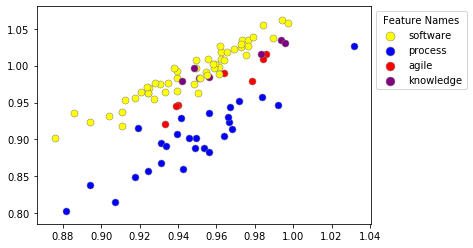

In [169]:
import matplotlib as mpl
import matplotlib.pyplot as plt


### plot the clusters
fig, ax = plt.subplots(1,1)


cluster_color_dict = {0:'yellow', 1 :'blue', 2 :'red', 3:'purple'} # change these to desired colors
#cluster_color_dict = {0:'green', 1 :'blue', 2 :'red'} # change these to desired colors
for i in range(len(t[0])):

    ax.scatter(t[0][i], t[1][i], c= cluster_color_dict[labels[i]], edgecolors='grey', lw = 0.5, s = 50)
    
p1 = [] # legend patches 
for i in range(4):
    print(i)
    h = ax.scatter([],[], c= cluster_color_dict[i], 
                    edgecolors= 'grey', lw = 0.5, s = 80, label = d[i]) 
    p1.append(h)

l1 = ax.legend(handles = p1, title= 'Feature Names',  bbox_to_anchor = (1,1))

In [170]:
# save the figure
fig.savefig('Evaluation_SLR3_4.1clusters.png', dpi=100, bbox_inches='tight')

In [171]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    

Top terms per cluster:
Cluster 0:
 software
 process
 research
 development
 quality
 management
 project
 model
 product
 systems
Cluster 1:
 process
 software
 studies
 papers
 research
 improvement
 study
 review
 models
 search
Cluster 2:
 agile
 software
 scrum
 development
 agility
 game
 studies
 dase
 research
 pilot
Cluster 3:
 knowledge
 social
 sharing
 debt
 media
 cultural
 trust
 network
 project
 based


In [172]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfObj1.index.values
cluster_map['cluster'] = model.labels_

In [173]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
2,2,0
3,3,0
5,5,0
7,7,0
10,10,0
13,13,0
14,14,0
16,16,0
17,17,0
18,18,0


In [25]:
%store dfObj1

Stored 'dfObj1' (DataFrame)


In [258]:
from sklearn import metrics

In [259]:
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))

Adjusted Rand-Index: 0.176
